<a href="https://colab.research.google.com/github/gowravmannem/Aromatase-Drug-Discovery/blob/main/aromatase_project_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing Conda and rdkit

In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-07-06 19:26:48--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’

Miniconda3-py37_4.8 100%[===================>]  81.12M   339MB/s    in 0.2s    

2022-07-06 19:26:48 (339 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: | / done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1003
    - conda-package-handling==1.6.0=py37h

# Installing Pandas

In [ ]:
import pandas as pd

# Loading Bioactivity Data

In [ ]:
aromatase_currated = pd.read_csv('aromatase_currated.csv')
aromatase_currated

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,7100.00
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,50000.00
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,238.00
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,57.00
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,54.00
...,...,...,...,...
2813,CHEMBL4755831,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,5.24
2814,CHEMBL4750835,Nc1ccc(C(Cn2cncn2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,104.00
2815,CHEMBL4745681,Nc1ccc(C(Cn2cnnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,17.70
2816,CHEMBL4778401,Oc1ccc(C(=C(Cn2ccnc2)c2cccc(O)c2)c2ccc(O)cc2)cc1,active,60.40


# Calculating Lipinski descriptors

Using the Lipinski's rule we can evaluate the druglikeness of a compound. This is based on the Absorption, Distribution, Metabolism and Excretion or the pharmacokinetic profile of a compound. 

The Lipinski's Rule states the following:

1) Molecular weight < 500 Dalton                                           
2) Octanol-water partition coefficient (LogP) < 5             
3) Hydrogen bond donors < 5                 
4)Hydrogen bond acceptors < 10

### Importing nesscary Libraries

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

### Calculating descriptor value

In [ ]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation
# this method calculates all the lipinski decriptors and places them in a new dataframe
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
# perform he above method on our cononical_smiles colums
aromatase_lipinski = lipinski(aromatase_currated.canonical_smiles)
aromatase_lipinski


,MW,LogP,NumHDonors,NumHAcceptors
0,329.528,4.28820,2.0,2.0
1,315.501,3.89810,2.0,2.0
2,412.306,5.70542,0.0,3.0
3,319.383,4.63450,0.0,3.0
4,321.811,4.58780,0.0,3.0
...,...,...,...,...
2813,383.451,4.53580,3.0,5.0
2814,384.439,3.93080,3.0,6.0
2815,384.439,3.93080,3.0,6.0
2816,384.435,4.65920,3.0,5.0


### Combining Dataframes

In [ ]:
# combined the linkinski descriptors with the aromatase_currated dataframe
aromatase_combined = pd.concat([aromatase_currated,aromatase_lipinski], axis=1)
aromatase_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,7100.00,329.528,4.28820,2.0,2.0
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,50000.00,315.501,3.89810,2.0,2.0
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,238.00,412.306,5.70542,0.0,3.0
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,57.00,319.383,4.63450,0.0,3.0
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,54.00,321.811,4.58780,0.0,3.0
...,...,...,...,...,...,...,...,...
2813,CHEMBL4755831,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,5.24,383.451,4.53580,3.0,5.0
2814,CHEMBL4750835,Nc1ccc(C(Cn2cncn2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,104.00,384.439,3.93080,3.0,6.0
2815,CHEMBL4745681,Nc1ccc(C(Cn2cnnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,17.70,384.439,3.93080,3.0,6.0
2816,CHEMBL4778401,Oc1ccc(C(=C(Cn2ccnc2)c2cccc(O)c2)c2ccc(O)cc2)cc1,active,60.40,384.435,4.65920,3.0,5.0


# Converting IC50 to pIC50

We need to convert standard_value datapoints from IC50 to pIC50 so that the data is more unifrom.

In [ ]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

Values greater than 100 million will need to be capped at 100 million. Otherwise, the above function will output a  value equal to or less than -1

In [ ]:
aromatase_combined.standard_value.describe()

count    2.818000e+03
mean     2.229110e+10
std      7.327166e+11
min      0.000000e+00
25%      1.052500e+02
50%      1.049000e+03
75%      7.465000e+03
max      3.388442e+13
Name: standard_value, dtype: float64

The max value oif the standard_value column is clearly larger than 100,000,000, hinting that there are otehr value greater than than this threshold. We need to fix this first with the following function.

In [ ]:
-np.log10( (10**-9)* 100000000 )

1.0

In [ ]:
-np.log10( (10**-9)* 10000000000 )

-1.0

In [ ]:
def del_large_vals(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x=input.drop('standard_value', 1)

    return x

In [ ]:
aromatase_combo_norm = del_large_vals(aromatase_combined)
aromatase_combo_norm

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,7100.00
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,50000.00
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,238.00
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,57.00
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,54.00
...,...,...,...,...,...,...,...,...
2813,CHEMBL4755831,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,383.451,4.53580,3.0,5.0,5.24
2814,CHEMBL4750835,Nc1ccc(C(Cn2cncn2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,384.439,3.93080,3.0,6.0,104.00
2815,CHEMBL4745681,Nc1ccc(C(Cn2cnnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,384.439,3.93080,3.0,6.0,17.70
2816,CHEMBL4778401,Oc1ccc(C(=C(Cn2ccnc2)c2cccc(O)c2)c2ccc(O)cc2)cc1,active,384.435,4.65920,3.0,5.0,60.40


In [ ]:
aromatase_combo_norm.standard_value_norm.describe()

count    2.818000e+03
mean     3.269816e+05
std      5.013383e+06
min      0.000000e+00
25%      1.052500e+02
50%      1.049000e+03
75%      7.465000e+03
max      1.000000e+08
Name: standard_value_norm, dtype: float64

The maximum of standard_value is now at 100,000,000. The del_large_vals() function works!

Make sure you update the pIC50_convert() function. It should be 'standard_value_norm'

In [ ]:
# now that all the outliers are taken care of we apply the pIC50_convert() function
aromatase_final = pIC50(aromatase_combo_norm)
aromatase_final

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL341591,CC12CCC(O)CC1=CCC1C2CCC2(C)C(CC3CN3)CCC12,intermediate,329.528,4.28820,2.0,2.0,5.148742
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
...,...,...,...,...,...,...,...,...
2813,CHEMBL4755831,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,383.451,4.53580,3.0,5.0,8.280669
2814,CHEMBL4750835,Nc1ccc(C(Cn2cncn2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,384.439,3.93080,3.0,6.0,6.982967
2815,CHEMBL4745681,Nc1ccc(C(Cn2cnnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,384.439,3.93080,3.0,6.0,7.752027
2816,CHEMBL4778401,Oc1ccc(C(=C(Cn2ccnc2)c2cccc(O)c2)c2ccc(O)cc2)cc1,active,384.435,4.65920,3.0,5.0,7.218963


In [ ]:
aromatase_final['pIC50']

0       5.148742
1       4.301030
2       6.623423
3       7.244125
4       7.267606
          ...   
2813    8.280669
2814    6.982967
2815    7.752027
2816    7.218963
2817    6.357535
Name: pIC50, Length: 2818, dtype: float64

In [ ]:
# the pIC50_convert() function works !
aromatase_final.pIC50.describe()

count    2818.000000
mean             inf
std              NaN
min         1.000000
25%         5.126970
50%         5.979240
75%         6.977782
max              inf
Name: pIC50, dtype: float64

In [ ]:
# save dataframe to csv file
aromatase_final.to_csv('aromatase_3class_pIC50.csv')

# Removing the 'Intermediate' class

The intermediate class adds an unesscary layer of complexity to our prediction model. Without it, the model will be cleaner and more accurate.

In [83]:
aromatase_2class = aromatase_final[aromatase_final['bioactivity_class'] != 'intermediate']
aromatase_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
1,CHEMBL2111947,C[C@]12CC[C@H]3[C@@H](CC=C4C[C@@H](O)CC[C@@]43...,inactive,315.501,3.89810,2.0,2.0,4.301030
2,CHEMBL431859,CCn1c(C(c2ccc(F)cc2)n2ccnc2)c(C)c2cc(Br)ccc21,active,412.306,5.70542,0.0,3.0,6.623423
3,CHEMBL113637,CCn1cc(C(c2ccc(F)cc2)n2ccnc2)c2ccccc21,active,319.383,4.63450,0.0,3.0,7.244125
4,CHEMBL112021,Clc1ccccc1Cn1cc(Cn2ccnc2)c2ccccc21,active,321.811,4.58780,0.0,3.0,7.267606
6,CHEMBL41761,CCn1ccc2cc(C(c3ccc(F)cc3)n3ccnc3)ccc21,active,319.383,4.63450,0.0,3.0,7.387216
...,...,...,...,...,...,...,...,...
2813,CHEMBL4755831,Nc1ccc(C(Cn2ccnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,383.451,4.53580,3.0,5.0,8.280669
2814,CHEMBL4750835,Nc1ccc(C(Cn2cncn2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,384.439,3.93080,3.0,6.0,6.982967
2815,CHEMBL4745681,Nc1ccc(C(Cn2cnnc2)=C(c2ccc(O)cc2)c2ccc(O)cc2)cc1,active,384.439,3.93080,3.0,6.0,7.752027
2816,CHEMBL4778401,Oc1ccc(C(=C(Cn2ccnc2)c2cccc(O)c2)c2ccc(O)cc2)cc1,active,384.435,4.65920,3.0,5.0,7.218963


In [82]:
# save new dataframe to csv file
aromatase_2class.to_csv('aromatase_2class_pIC50.csv')

#Chemical Space Analysis with Lipinski descriptors

### Import Libraries

In [ ]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### Frequency plot of the 2 bioactivity class

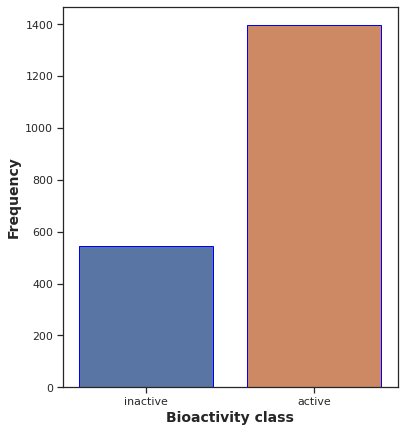

In [ ]:
plt.figure(figsize=(6, 7)) # sets size of plot image

sns.countplot(x='bioactivity_class', data=aromatase_2class, edgecolor='blue') # telling seaborn what data column to make the plot based on

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')# stylizing the x axis
plt.ylabel('Frequency', fontsize=14, fontweight='bold')# stylizing the y-axis

plt.savefig('aromatase_freqplot_bioactivity_class.pdf')# saving the plot image for later reference

### Scatterplot of Molecular weight vs. logP(Solubility)

/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)
/usr/local/lib/python3.7/dist-packages/matplotlib/colors.py:1026: RuntimeWarning: invalid value encountered in true_divide
  resdat /= (vmax - vmin)


ValueError: ignored

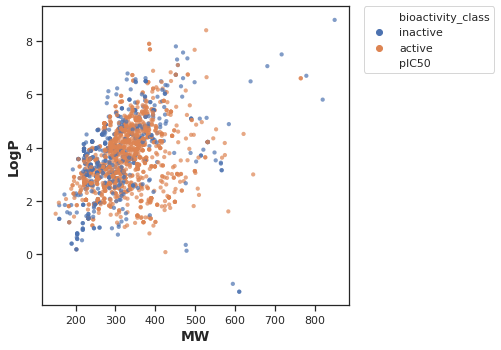

In [99]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=aromatase_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

## Statistical Analysis using Mann_Whitney U test

In [ ]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = aromatase_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = aromatase_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

Using the Mann-Whitney U test on the pIC50 and Lipsinki Descritors [Molecular Weight (MW), Solubility (LogP), NumHDonors, NumHAcceptors], we can determine the druglikeliness of aromatase.

# pIC50 values

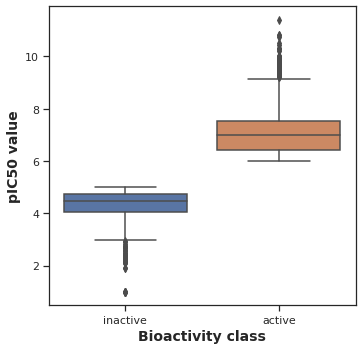

In [79]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = aromatase_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [80]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,0.0,1.334674e-257,0.05,Different distribution (reject H0)



# Molecular Weight (MW)



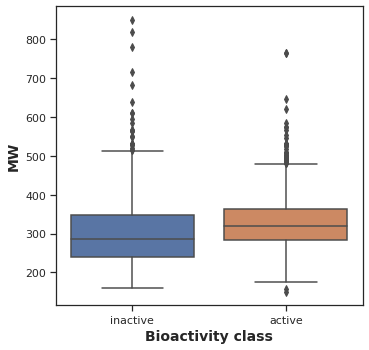

In [86]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = aromatase_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [87]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,301058.0,5.519539e-13,0.05,Different distribution (reject H0)


# Solubility (LogP)

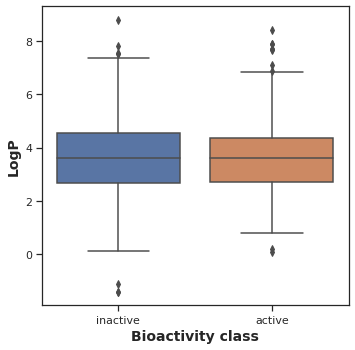

In [88]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = aromatase_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [89]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,377236.0,0.402165,0.05,Same distribution (fail to reject H0)


# NumHDonors

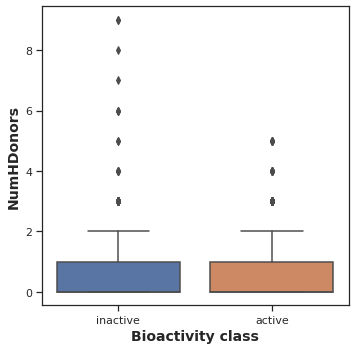

In [91]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = aromatase_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

In [93]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,328150.5,4.233839e-08,0.05,Different distribution (reject H0)


# NumHAcceptors

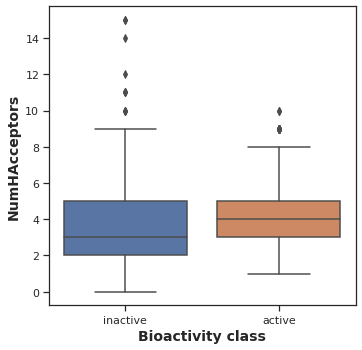

In [95]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = aromatase_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

In [96]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,310776.0,1.007833e-10,0.05,Different distribution (reject H0)


# Interpretation of results

###pIC50

There is statistically significant difference between the pIC50 values of inactive and active compounds. This was expected as we split the compounds into these two classes based on pIC50 values.         
pIC50 > 6  ---> Active                        
pIC50 < 5  ---> Inactive

### Lipsinki Descriptors

Of the 4 descriptors, only Solubility (LogB) exhibited NO statistically significant difference between Actives and Inactices. The other three descriptors (MW, NumHDonors, NumHAcceptors) all show statistically significant difference between Actives and Inactives.

# Saving Results to a Zip File

In [101]:
! zip -r results.zip . -i *.csv *.pdf

updating: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
updating: plot_ic50.pdf (deflated 36%)
updating: aromatase_currated.csv (deflated 83%)
updating: aromatase_3class_pIC50.csv (deflated 78%)
updating: aromatase_2class_pIC50.csv (deflated 78%)
updating: plot_NumHAcceptors.pdf (deflated 38%)
updating: plot_LogP.pdf (deflated 38%)
updating: plot_NumHDonors.pdf (deflated 38%)
updating: aromatase_freqplot_bioactivity_class.pdf (deflated 37%)
updating: mannwhitneyu_pIC50.csv (deflated 11%)
updating: plot_MW_vs_LogP.pdf (deflated 13%)
updating: mannwhitneyu_LogP.csv (deflated 9%)
updating: plot_MW.pdf (deflated 37%)
updating: mannwhitneyu_NumHDonors.csv (deflated 10%)
updating: mannwhitneyu_MW.csv (deflated 10%)
